#EDA

In [72]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import sys
sys.path.append('/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/')
from utils.preprocessing import Scalling


sns.set()

In [73]:
#membaca data
dataku = pd.read_csv('/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/data_set/data.csv',sep=";")
dataku

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [74]:
#cek data kosong
dataku.isna().sum().sum()

0

In [75]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [76]:
dataku.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [77]:
data_fitur = dataku.drop(columns='Target')
target = dataku["Target"]
data_fitur.var() # hitung variance

Marital status                                    3.669294e-01
Application mode                                  3.057141e+02
Application order                                 1.726052e+00
Course                                            4.258306e+06
Daytime/evening attendance\t                      9.727954e-02
Previous qualification                            1.043788e+02
Previous qualification (grade)                    1.739321e+02
Nacionality                                       4.781050e+01
Mother's qualification                            2.434594e+02
Father's qualification                            2.354110e+02
Mother's occupation                               6.979241e+02
Father's occupation                               6.382212e+02
Admission grade                                   2.097283e+02
Displaced                                         2.477161e-01
Educational special needs                         1.139771e-02
Debtor                                            1.007

In [78]:
data_fitur.cov() #hitung covariance

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,0.366929,2.796163,-0.100158,5.795644e+01,-0.051944,0.386971,-0.179000,-0.037039,1.825700,1.211508,...,0.014526,0.073019,0.051912,0.054488,-0.079875,-0.225702,0.009326,-0.032817,0.007338,-0.037130
Application mode,2.796163,305.714115,-6.577986,2.359137e+03,-1.658339,75.456893,-8.997741,-0.079956,32.458212,22.340281,...,0.553591,7.998693,4.993185,11.587985,-3.770288,-10.516209,0.632391,4.149045,-0.395877,-0.902638
Application order,-0.100158,-6.577986,1.726052,1.613287e+02,0.065013,-2.473972,-1.117289,-0.203635,-1.331547,-1.013683,...,-0.028772,-0.317127,0.083314,-0.285733,0.284357,0.380063,-0.015605,-0.344442,-0.020225,0.090066
Course,57.956437,2359.136969,161.328675,4.258306e+06,-27.772916,140.275929,-2204.768494,-484.028823,1756.175315,1606.014080,...,49.205435,-355.588602,1819.572240,2271.320159,1231.987341,3749.824600,47.933902,39.322895,50.532583,-94.922742
Daytime/evening attendance\t,-0.051944,-1.658339,0.065013,-2.777292e+01,0.097280,-0.229017,0.216353,0.039962,-0.996515,-0.669460,...,0.009832,-0.066991,0.000254,0.017990,0.031990,0.082063,-0.000994,0.051491,-0.010369,0.016234
Previous qualification,0.386971,75.456893,-2.473972,1.402759e+02,-0.229017,104.378759,14.022670,-2.063730,-2.102714,-1.036787,...,0.020381,2.803553,1.260376,4.632428,-0.265864,0.050143,0.039293,3.046993,-0.900371,1.485833
Previous qualification (grade),-0.179000,-8.997741,-1.117289,-2.204768e+03,0.216353,14.022670,173.932093,4.932369,-12.484693,-7.129644,...,-0.035769,-0.467808,-0.916589,-3.194580,1.998424,3.658682,-0.189024,1.588737,0.341196,-1.575279
Nacionality,-0.037039,-0.079956,-0.203635,-4.840288e+02,0.039962,-2.063730,4.932369,47.810504,-5.388595,-9.047603,...,0.043687,-0.096550,-0.305396,-0.702124,-0.372714,-0.306152,-0.073179,-0.011982,-0.085299,0.541150
Mother's qualification,1.825700,32.458212,-1.331547,1.756175e+03,-0.996515,-2.102714,-12.484693,-5.388595,243.459423,128.113173,...,0.034316,1.280362,1.204362,1.295650,-0.698940,-2.534677,0.250580,-4.752955,1.282415,-2.962965
Father's qualification,1.211508,22.340281,-1.013683,1.606014e+03,-0.669460,-1.036787,-7.129644,-9.047603,128.113173,235.410957,...,-0.183737,1.255950,0.821445,0.576286,0.244447,-0.646239,-0.085934,-3.184119,1.222691,-2.494028


In [79]:
data_fitur.std() #hitung standard deviasi

Marital status                                       0.605747
Application mode                                    17.484682
Application order                                    1.313793
Course                                            2063.566416
Daytime/evening attendance\t                         0.311897
Previous qualification                              10.216592
Previous qualification (grade)                      13.188332
Nacionality                                          6.914514
Mother's qualification                              15.603186
Father's qualification                              15.343108
Mother's occupation                                 26.418253
Father's occupation                                 25.263040
Admission grade                                     14.482001
Displaced                                            0.497711
Educational special needs                            0.106760
Debtor                                               0.317480
Tuition 

In [80]:
def box_plot(data): #fungsi boxplot
    sns.set(rc={'figure.figsize':(38,10)})
    melted_data = pd.melt(data, value_vars=data.columns[:-1], var_name="variabel", value_name="value")
    ax = sns.boxplot(x="variabel",y="value",data=melted_data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

/tmp/ipykernel_51768/1637873670.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


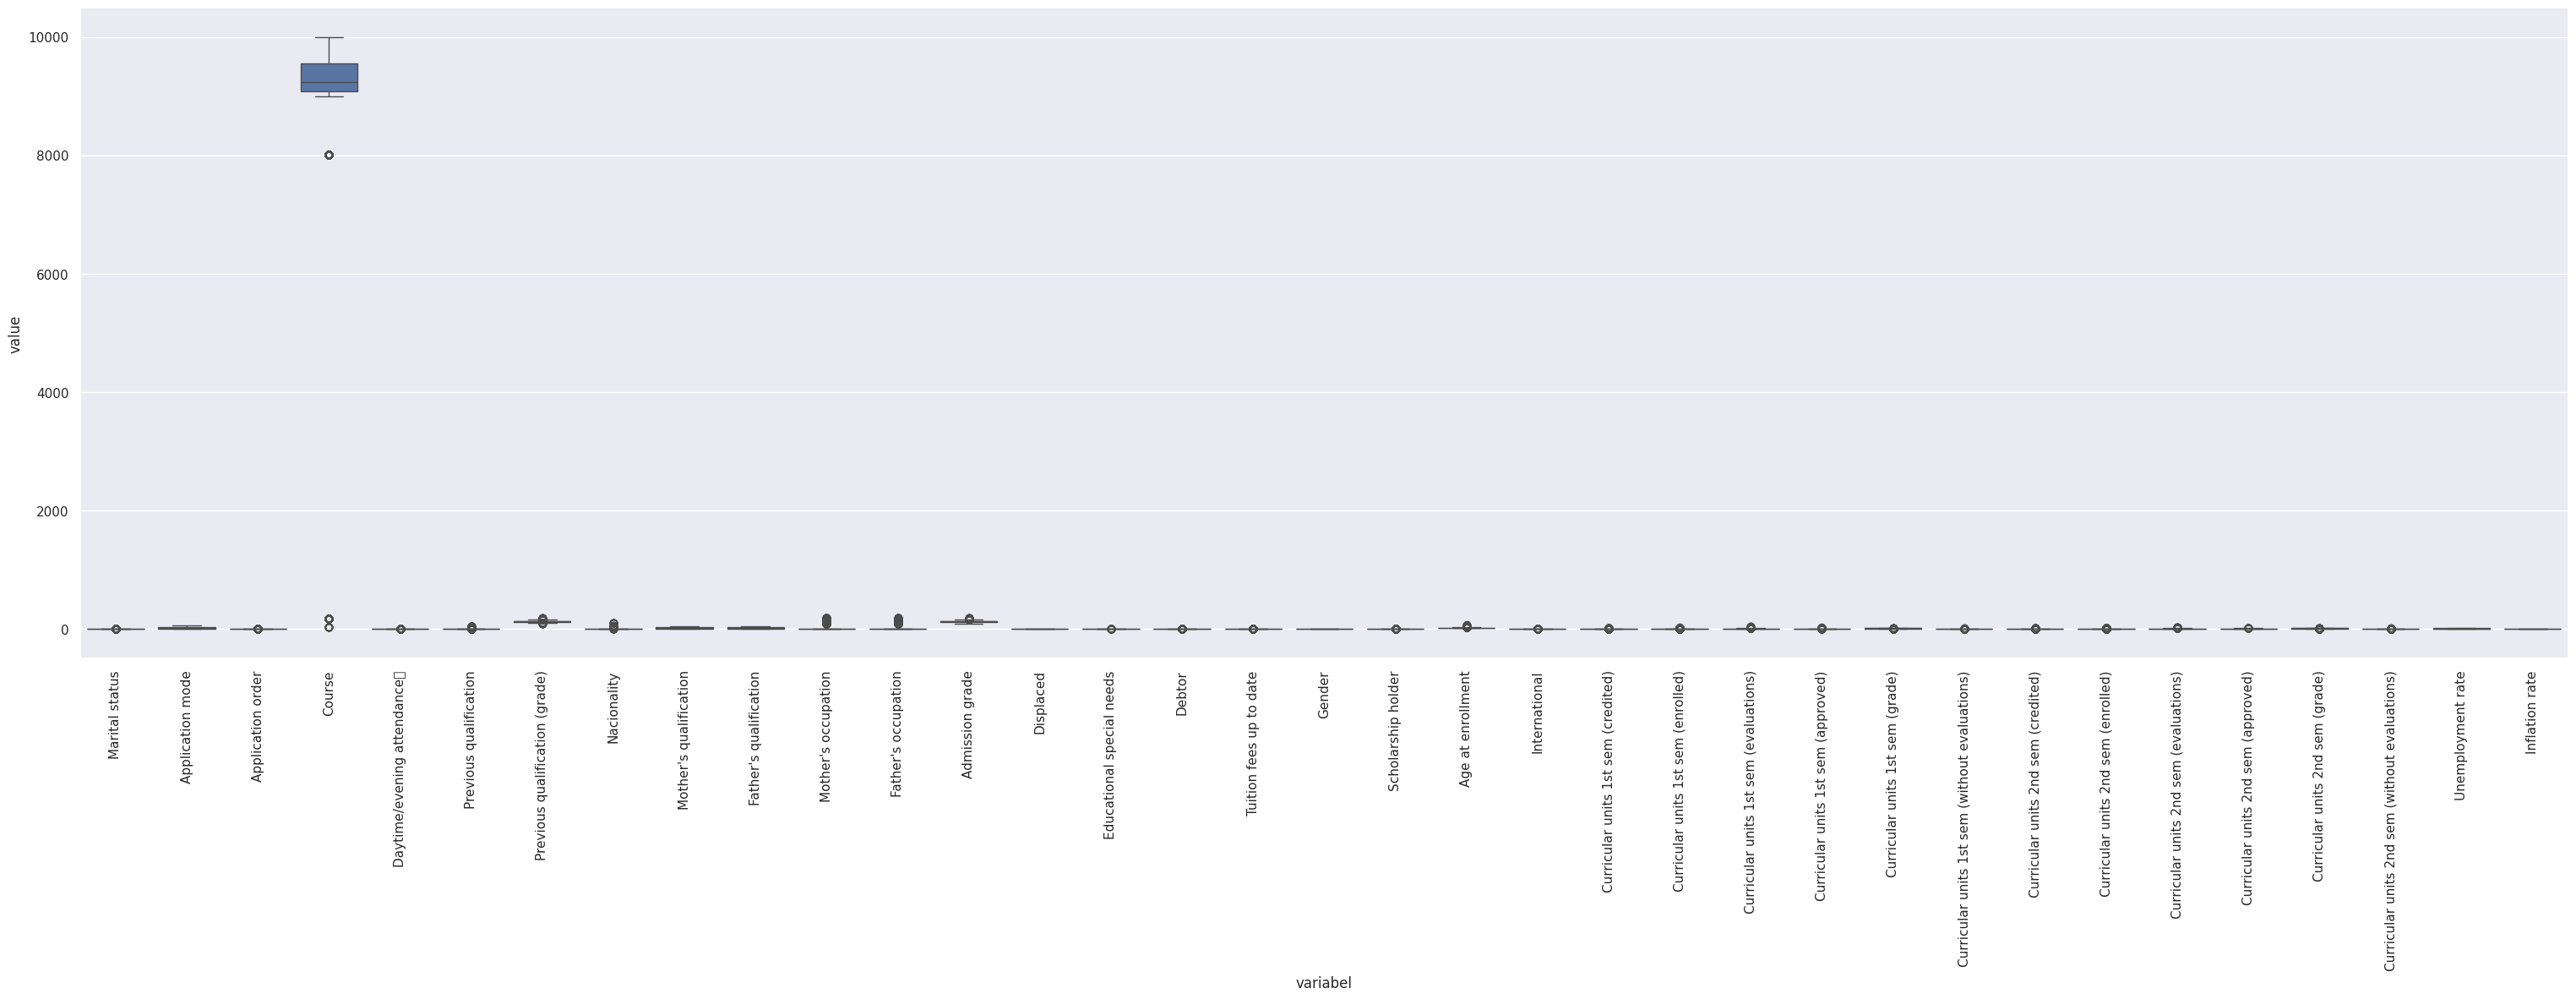

In [81]:
box_plot(data_fitur)

In [82]:
def distribusi(data):
    
    num_kolom = len(data.columns)
    num_rows = (num_kolom + 4)//5
    num_rows = min(15, num_rows)

    fig,axes = plt.subplots(num_rows, 5, figsize=(30, 20))
    
    for i, kolom in enumerate(data.columns):
        row = i //5
        col = i % 5
        sns.histplot(data[kolom], kde=True, ax=axes[row, col])
        #axes[row,col].set_title(kolom)
    
    for i in range(num_kolom, num_rows * 5):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])
    
    fig.suptitle('Distribusi untuk Setiap Kolom', y=1.02)


    plt.tight_layout()
    plt.show()

/tmp/ipykernel_51768/2940113894.py:23: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


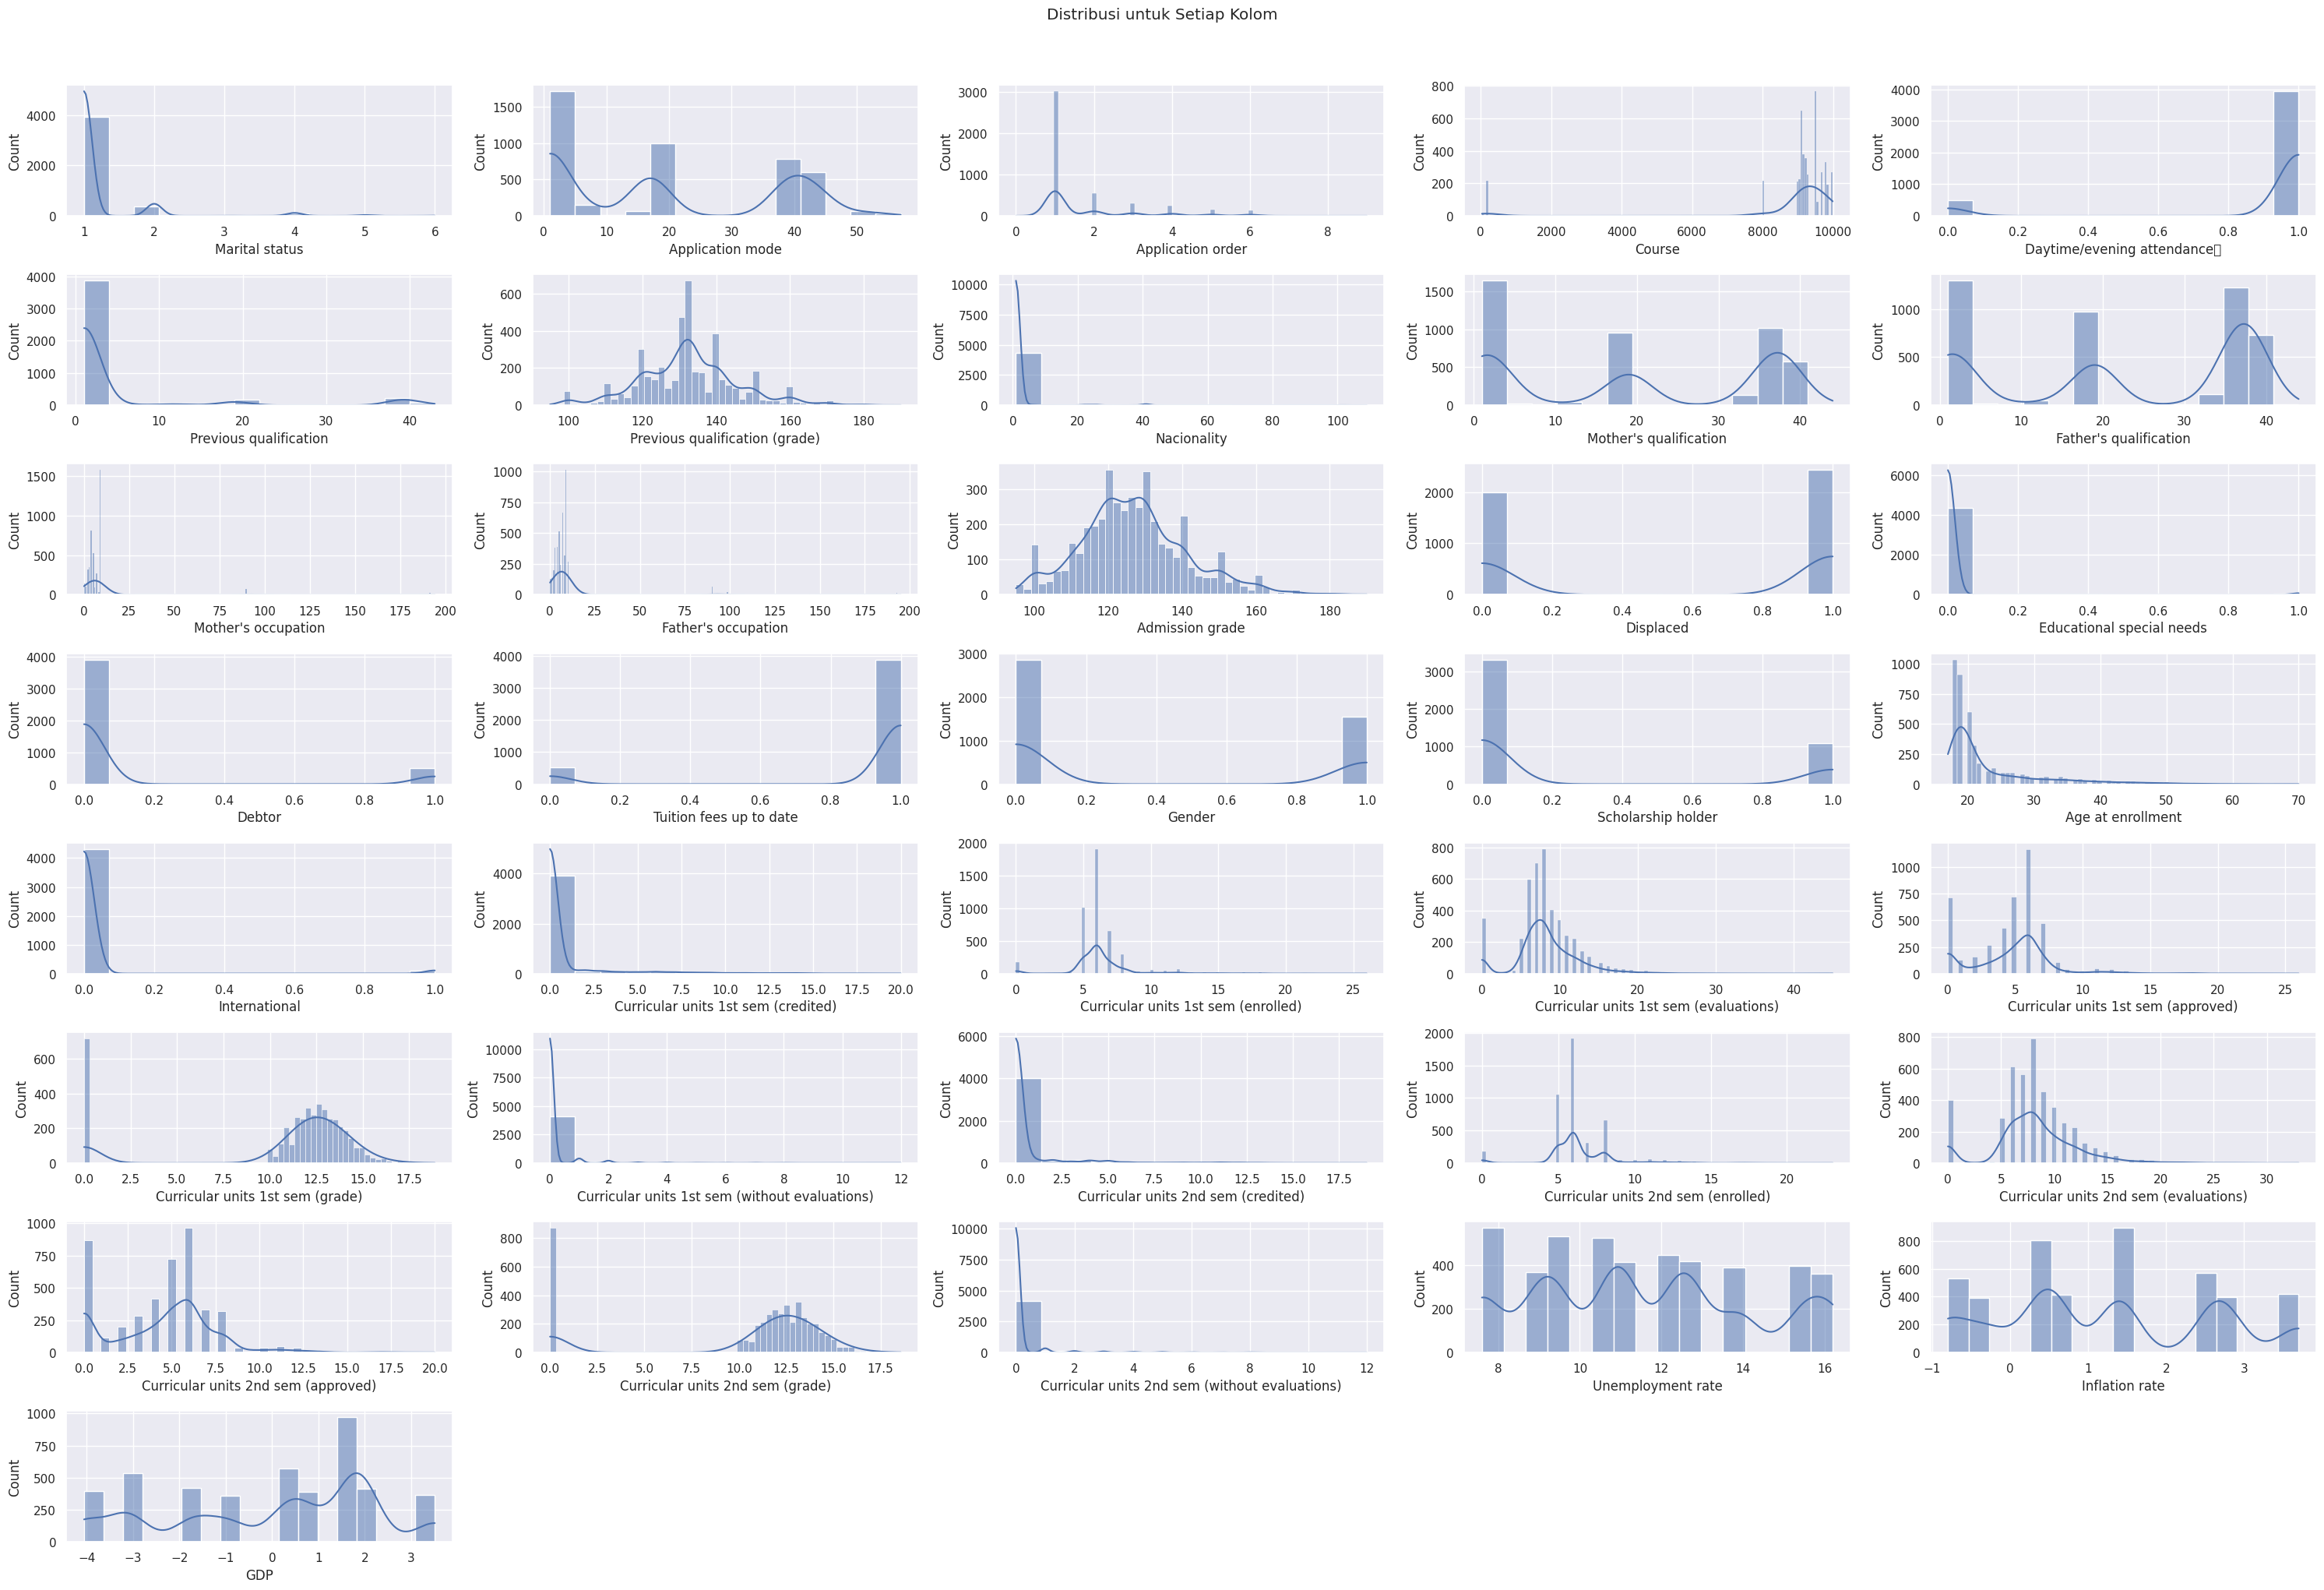

In [83]:
distribusi(data_fitur)

In [84]:
def scatter(data):
    num_kolom = len(data.columns)
    num_rows = (num_kolom + 4)//5
    num_rows = min(15, num_rows)

    fig,axes = plt.subplots(num_rows, 5, figsize=(30, 20))
    
    for i, kolom in enumerate(data.columns):
        row = i //5
        col = i % 5
        sns.scatterplot(x=data[kolom],y=data["Target"], data= data, ax=axes[row, col])
        #axes[row,col].set_title(kolom)
    
    for i in range(num_kolom, num_rows * 5):
        row = i // 5
        col = i % 5
        fig.delaxes(axes[row, col])
    
    fig.suptitle('Distribusi untuk Setiap Kolom', y=1.02)


    plt.tight_layout()
    plt.show()

/tmp/ipykernel_51768/556954052.py:22: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


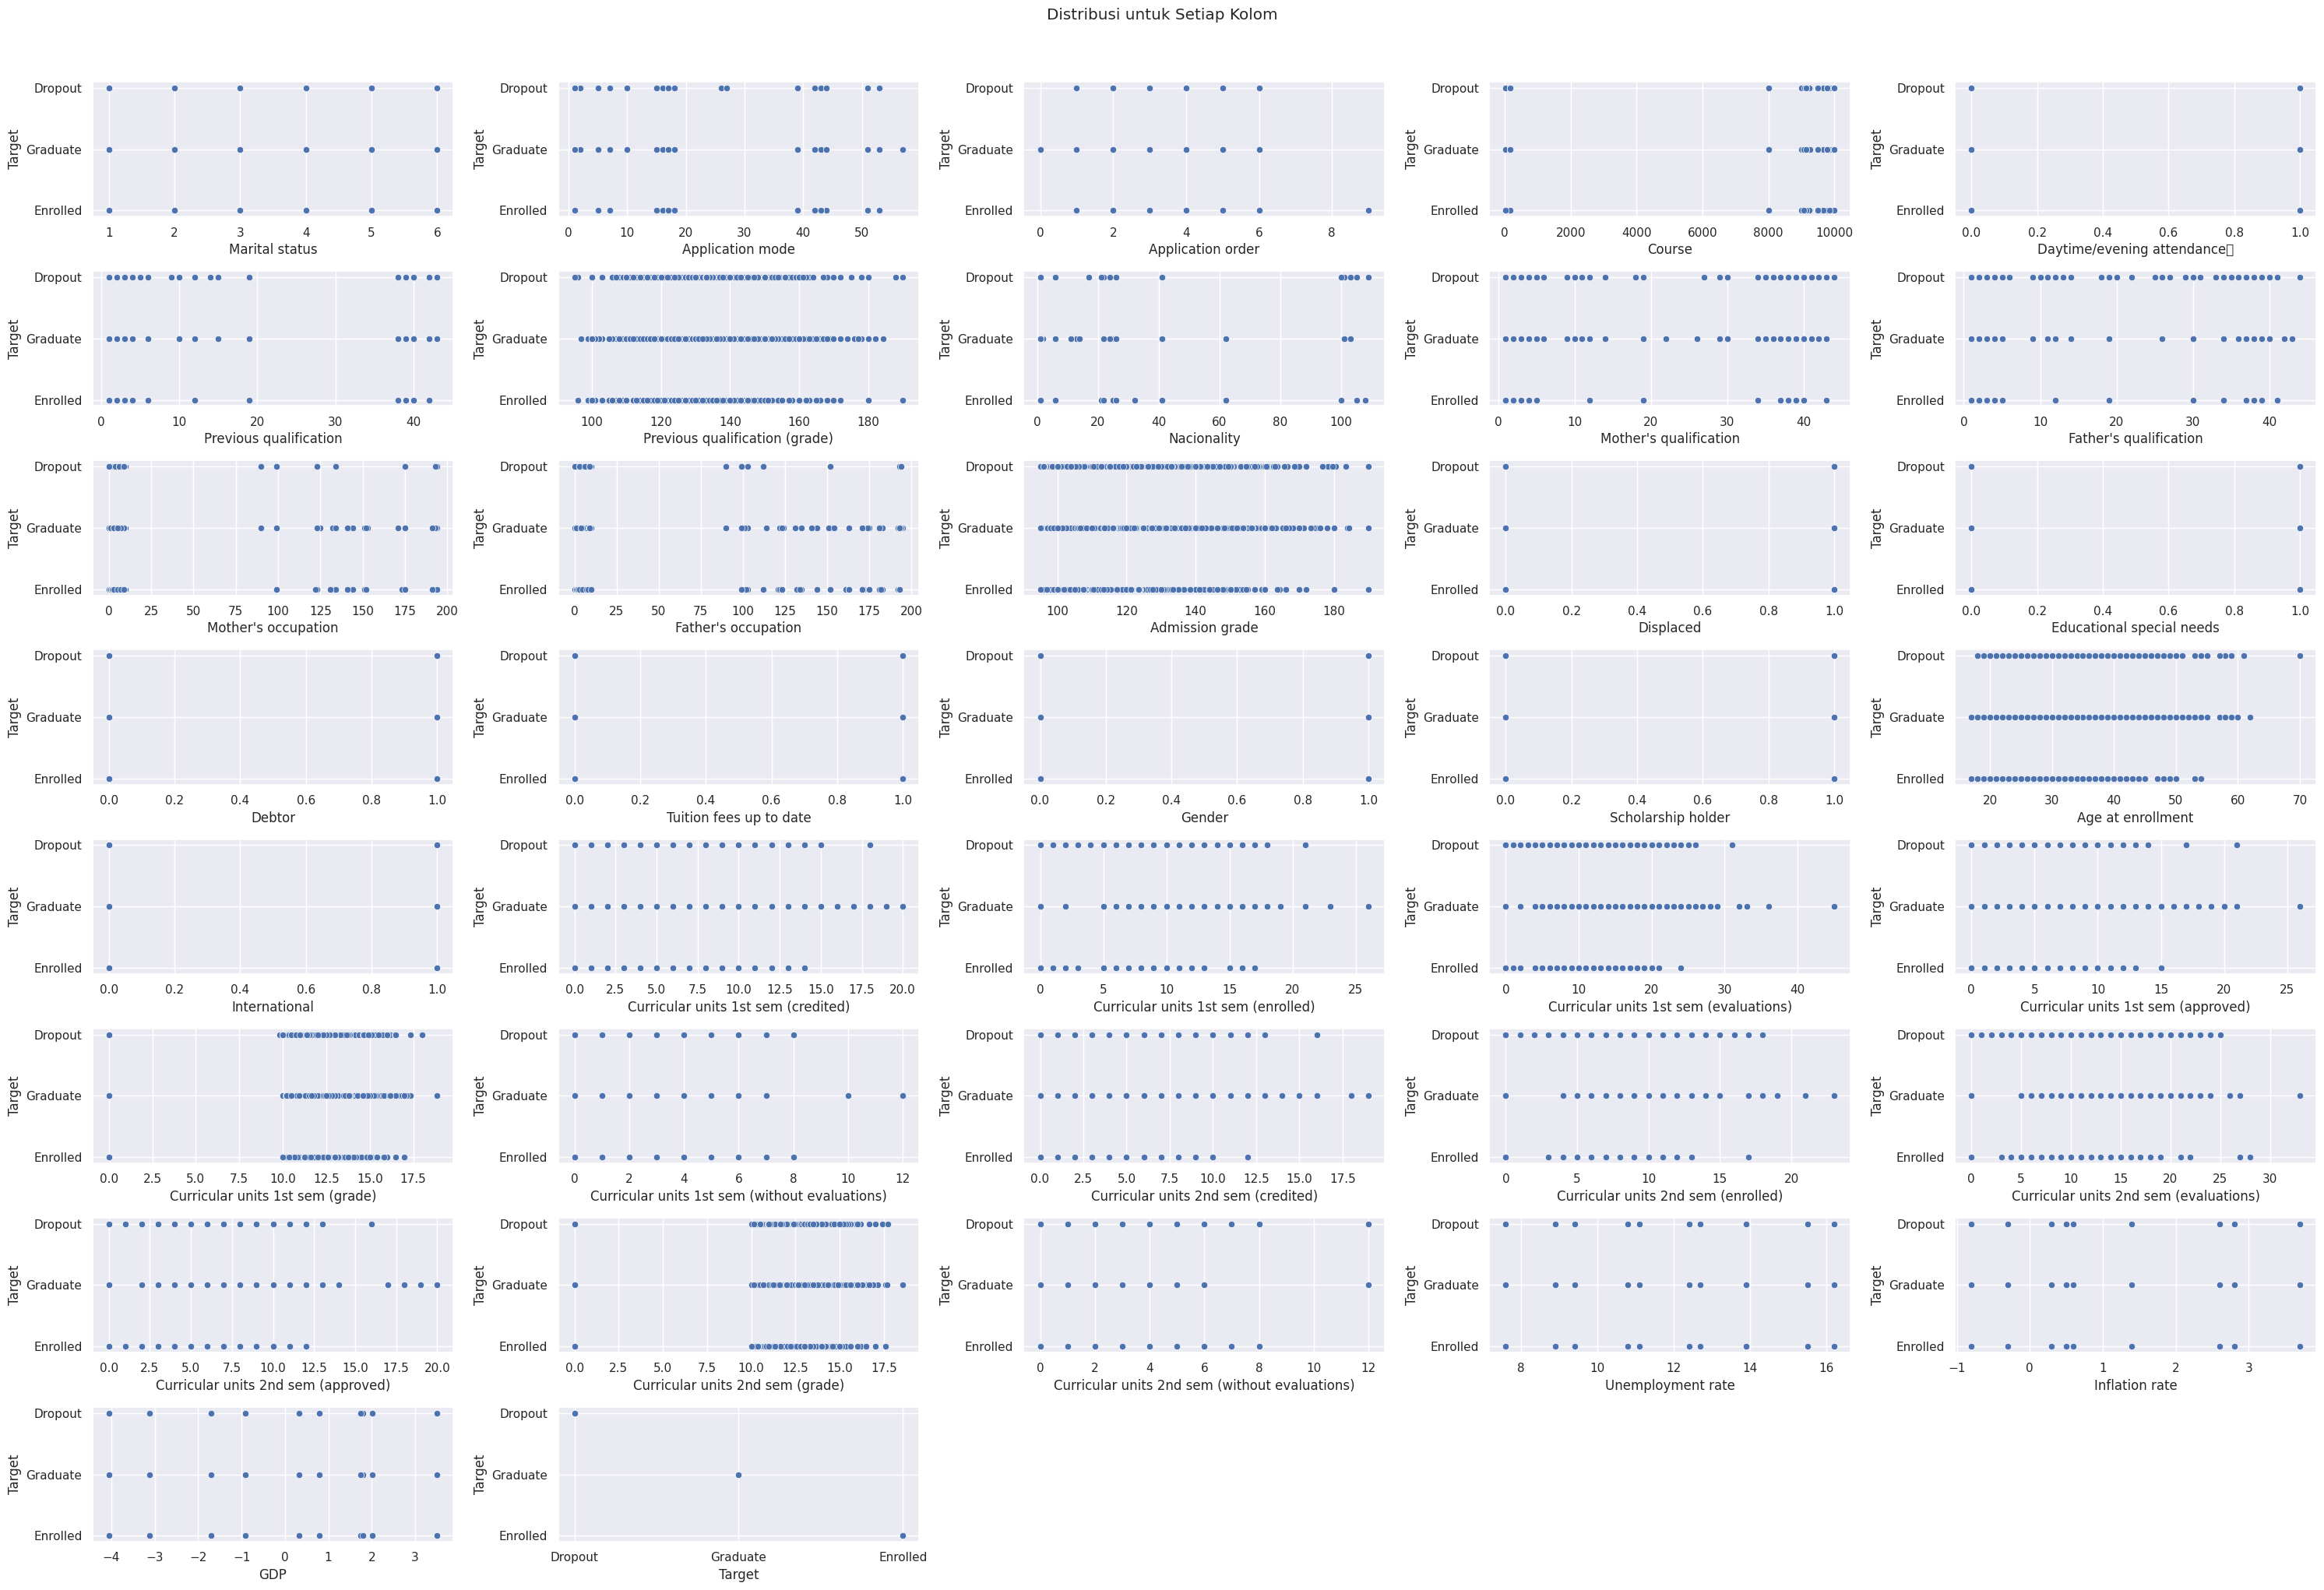

In [85]:
scatter(dataku)

In [86]:
#drop kolom
kolom_drop = ["Marital status","Daytime/evening attendance\t","Displaced","Educational special needs","Debtor","Tuition fees up to date","Gender", "Scholarship holder", "International","Nacionality"]
data_fitur = data_fitur.drop(columns=kolom_drop)


/tmp/ipykernel_51768/1637873670.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


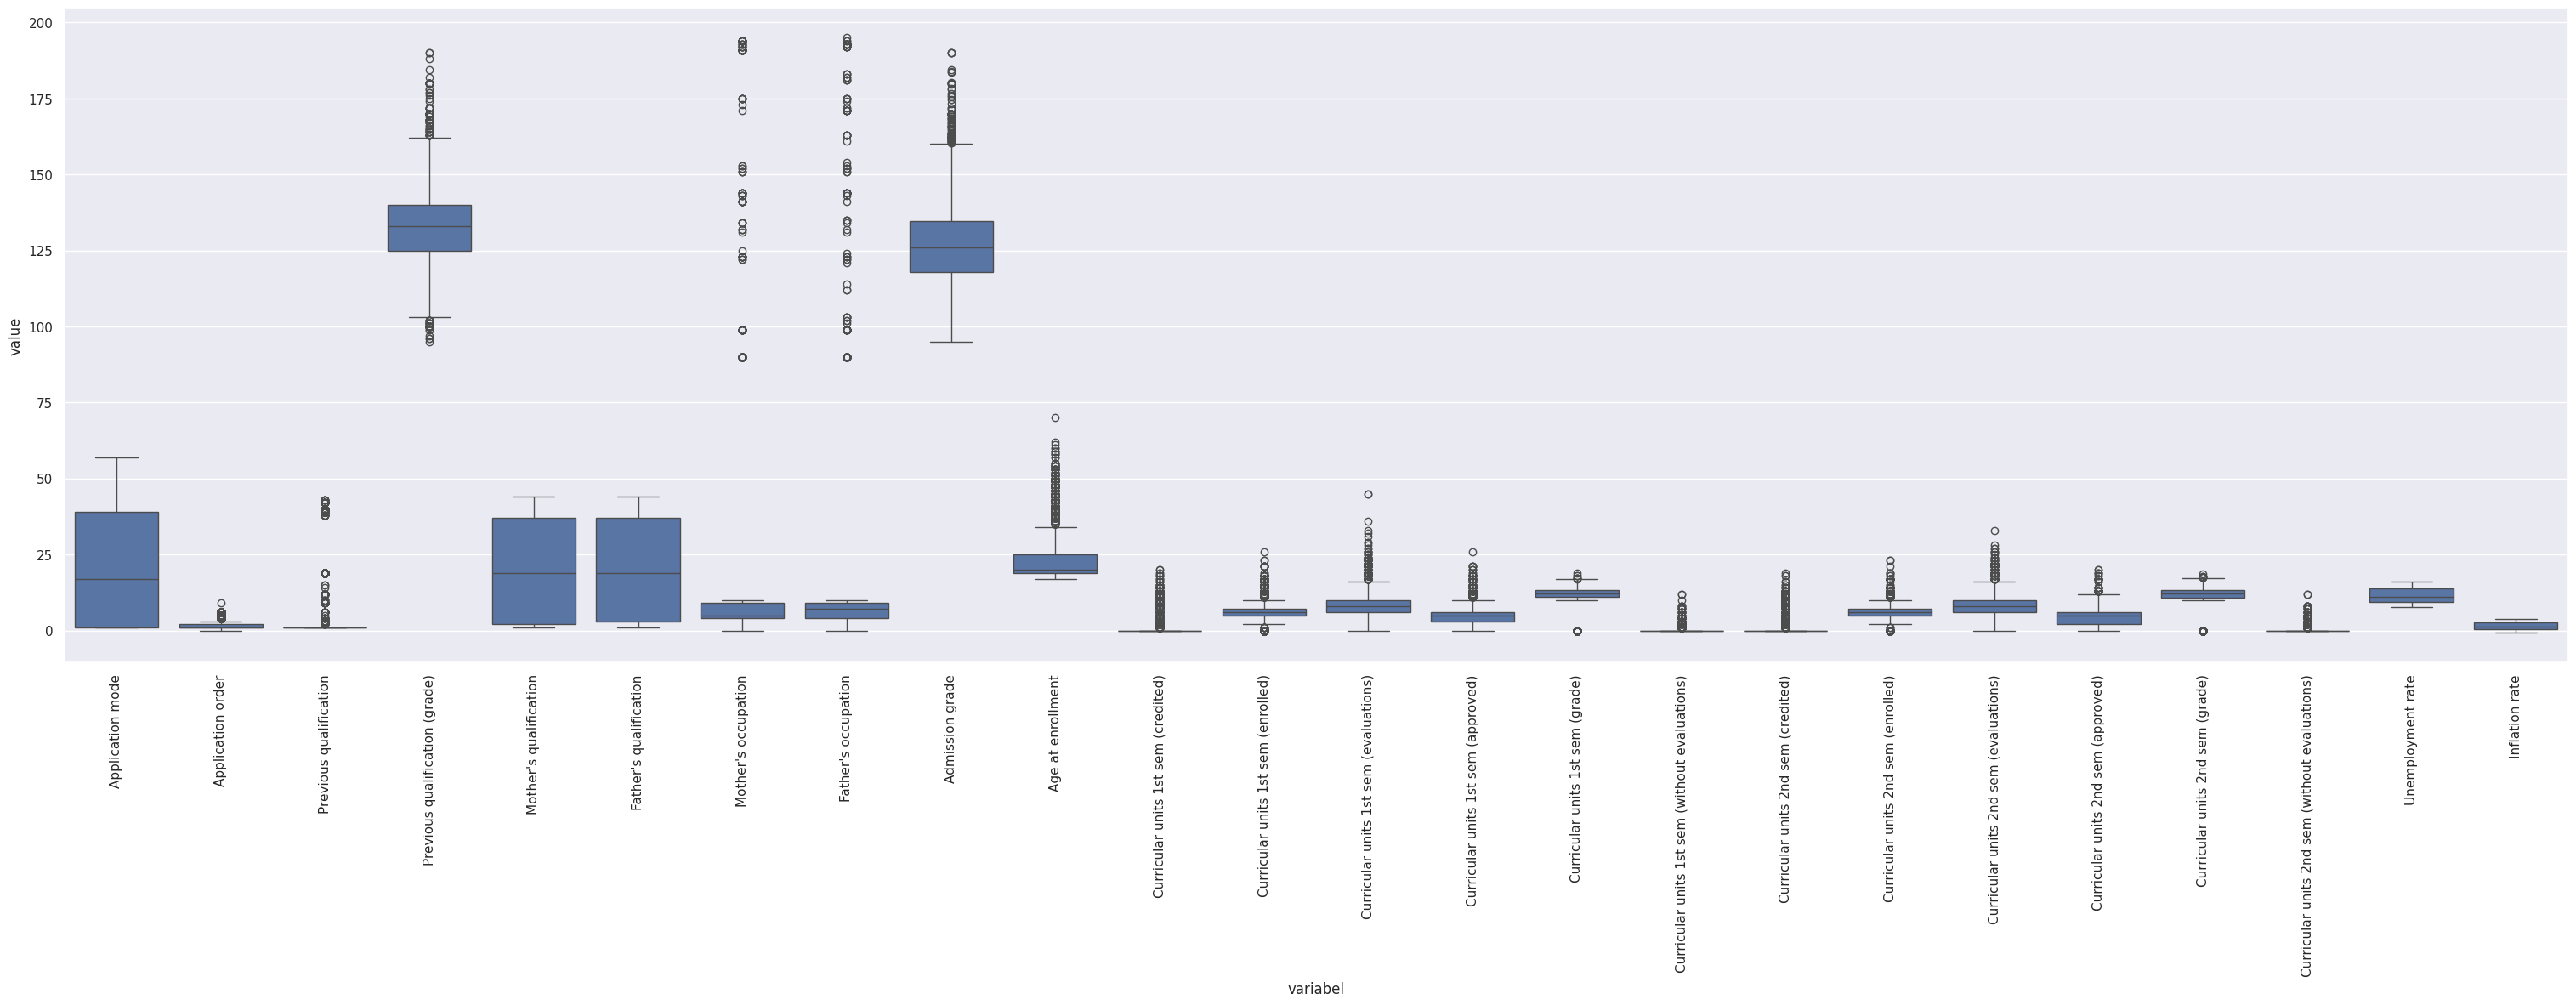

In [87]:
box_plot(data_fitur.drop(columns="Course"))

In [88]:
z = np.abs(stats.zscore(data_fitur[data_fitur.columns[:-1]]))
z

,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate
0,0.095470,2.490896,4.209520,0.35023,0.804841,0.036018,0.669778,0.225661,0.080456,0.022229,...,2.197102,0.199273,0.282442,2.838337,2.042630,1.471527,1.963489,0.199441,0.287638,0.124386
1,0.209869,0.554068,0.192580,0.35023,2.076819,1.189759,1.256427,0.301375,0.317984,1.071926,...,0.693599,0.199273,0.282442,0.105726,0.522682,0.518904,0.659562,0.199441,0.876222,1.105222
2,1.010660,2.490896,0.103404,0.35023,0.804841,1.117723,0.959802,0.074233,0.080456,0.150419,...,2.197102,0.199273,0.282442,0.105726,2.042630,1.471527,1.963489,0.199441,0.287638,0.124386
3,0.095470,0.207173,0.444115,0.35023,0.804841,1.181819,0.959802,0.225661,0.317984,0.509526,...,0.575611,0.199273,0.282442,0.105726,0.490616,0.187165,0.416450,0.199441,0.813253,1.466871
4,1.162916,0.554068,0.408389,0.35023,2.473171,1.117723,1.024985,0.074233,0.080456,1.002867,...,0.349468,0.199273,0.282442,0.105726,0.522682,0.518904,0.531608,0.199441,0.876222,1.105222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.010660,3.252137,0.444115,0.35023,0.577342,1.189759,1.386793,0.225661,0.278396,0.329972,...,0.611007,0.199273,0.282442,0.105726,0.016033,0.187165,0.467631,0.199441,1.476924,1.137005
4420,1.010660,0.207173,0.444115,0.35023,0.956508,1.189759,1.386793,0.074233,0.080456,0.550961,...,0.280641,0.199273,0.282442,0.105726,0.522682,0.808050,0.147747,0.199441,0.175007,0.454253
4421,1.010660,0.554068,0.311805,0.35023,1.621820,1.117723,0.959802,0.074233,0.080456,1.555339,...,0.882010,0.199273,0.282442,0.805144,0.237291,1.139788,0.627573,0.199441,0.876222,1.105222
4422,1.010660,0.554068,0.140722,0.35023,3.593483,1.117723,0.959802,0.149947,0.278396,1.852293,...,0.652303,0.199273,0.282442,0.561161,0.522682,0.187165,0.339678,0.199441,0.813253,1.466871


In [89]:
#kick outlier zscores <5

z = np.abs(stats.zscore(data_fitur[data_fitur.columns[:-1]]))
data_fitur = data_fitur[(z<5).all(axis=1)]
len(data_fitur)


4202

In [90]:
data_fitur

,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,17,5,171,1,122.0,19,12,5,9,127.3,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,15,1,9254,1,160.0,1,3,3,3,142.5,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,5,9070,1,122.0,37,37,9,9,124.8,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,17,2,9773,1,122.0,38,37,5,3,119.6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,39,1,8014,1,100.0,37,38,9,9,141.5,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,9773,1,125.0,1,1,5,4,122.2,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,2,9773,1,120.0,1,1,9,9,119.0,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,9500,1,154.0,37,37,9,9,149.5,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,9147,1,180.0,37,37,7,4,153.8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


/tmp/ipykernel_51768/1637873670.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


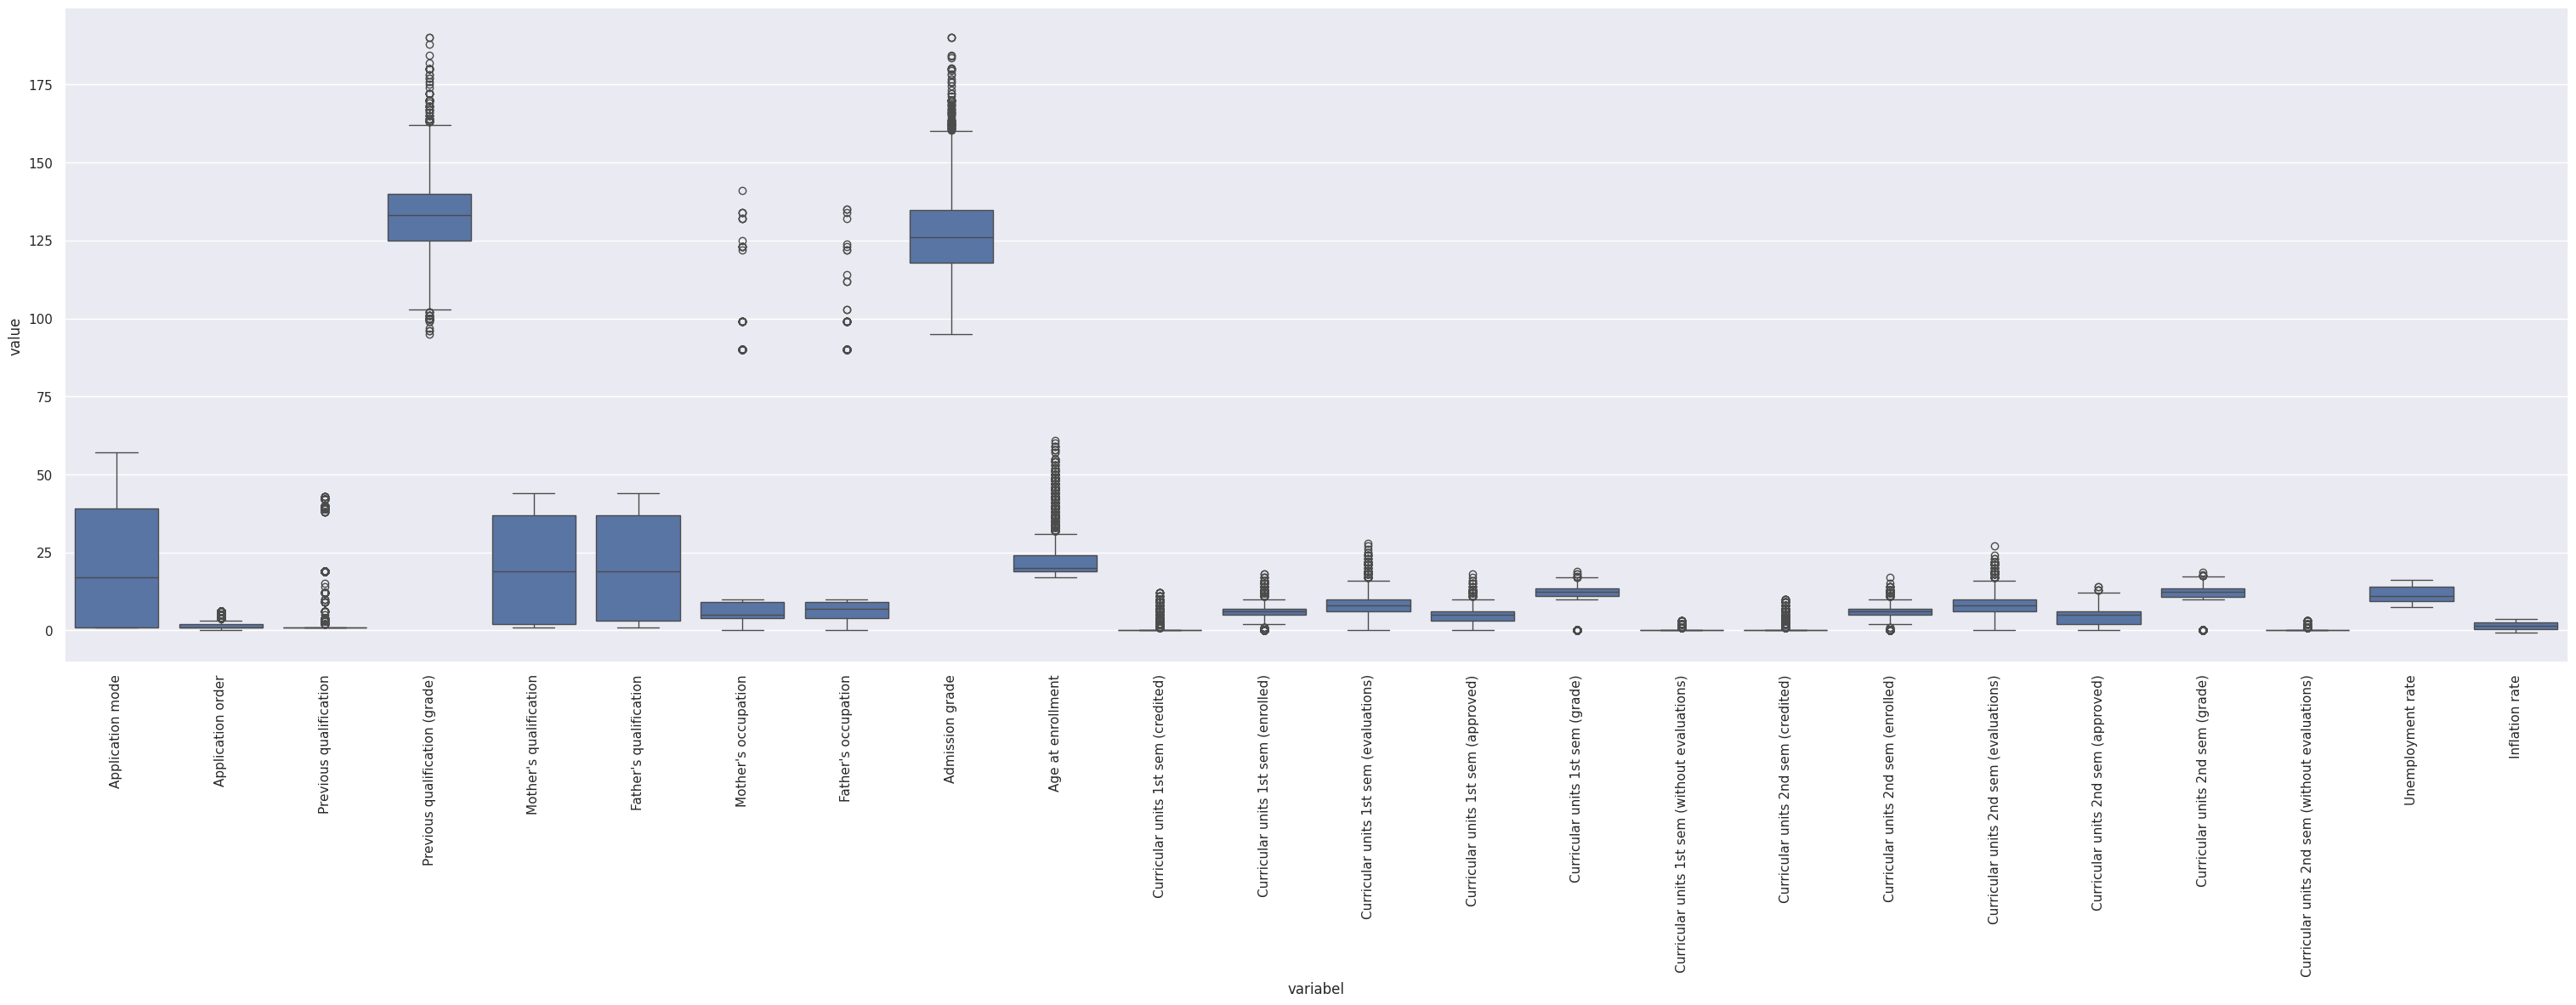

In [91]:
box_plot(data_fitur.drop(columns="Course"))

In [92]:
scall = Scalling(data_fitur)
data_fitur_standard = scall.standarisasi(data_fitur.columns)
data_fitur_nomral = scall.normalisasi(data_fitur.columns)
data_fitur_standard


,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.285714,0.833333,0.013858,0.0,0.284211,0.418605,0.255814,0.035461,0.066667,0.340000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.372093,0.488889,0.766182
1,0.250000,0.166667,0.925989,0.0,0.684211,0.000000,0.046512,0.021277,0.022222,0.500000,...,0.0,0.0,0.352941,0.222222,0.428571,0.735897,0.0,0.732558,0.111111,0.640687
2,0.000000,0.833333,0.907512,0.0,0.284211,0.837209,0.837209,0.063830,0.066667,0.313684,...,0.0,0.0,0.352941,0.000000,0.000000,0.000000,0.0,0.372093,0.488889,0.766182
3,0.285714,0.333333,0.978108,0.0,0.284211,0.860465,0.837209,0.035461,0.022222,0.258947,...,0.0,0.0,0.352941,0.370370,0.357143,0.667692,0.0,0.209302,0.000000,0.124174
4,0.678571,0.166667,0.801466,0.0,0.052632,0.837209,0.860465,0.063830,0.066667,0.489474,...,0.0,0.0,0.352941,0.222222,0.428571,0.700000,0.0,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.000000,1.000000,0.978108,0.0,0.315789,0.000000,0.000000,0.035461,0.029630,0.286316,...,0.0,0.0,0.352941,0.296296,0.357143,0.682051,0.0,0.918605,0.800000,0.000000
4420,0.000000,0.333333,0.978108,0.0,0.263158,0.000000,0.000000,0.063830,0.066667,0.252632,...,0.0,0.0,0.352941,0.222222,0.142857,0.592308,0.0,0.406977,0.311111,0.803170
4421,0.000000,0.166667,0.950693,0.0,0.621053,0.837209,0.837209,0.063830,0.066667,0.573684,...,0.0,0.0,0.470588,0.333333,0.071429,0.726923,0.0,0.732558,0.111111,0.640687
4422,0.000000,0.166667,0.915244,0.0,0.894737,0.837209,0.837209,0.049645,0.029630,0.618947,...,0.0,0.0,0.294118,0.222222,0.357143,0.646154,0.0,0.209302,0.000000,0.124174


In [93]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_fitur)
data_scaled

array([[-0.07319571,  2.47412964, -4.20550885, ..., -0.29426464,
         0.11958361,  0.7762174 ],
       [-0.18841145, -0.56194914,  0.19175468, ...,  0.87498468,
        -1.10337065,  0.35425349],
       [-0.99492156,  2.47412964,  0.10267657, ..., -0.29426464,
         0.11958361,  0.7762174 ],
       ...,
       [-0.99492156, -0.56194914,  0.31084824, ...,  0.87498468,
        -1.10337065,  0.35425349],
       [-0.99492156, -0.56194914,  0.13995382, ..., -0.82231272,
        -1.46306308, -1.38246111],
       [-0.47645077, -0.56194914,  0.44301305, ...,  0.42237204,
         1.77416878, -0.75173611]])

In [94]:
data_fitur_standard

,Application mode,Application order,Course,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.285714,0.833333,0.013858,0.0,0.284211,0.418605,0.255814,0.035461,0.066667,0.340000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.372093,0.488889,0.766182
1,0.250000,0.166667,0.925989,0.0,0.684211,0.000000,0.046512,0.021277,0.022222,0.500000,...,0.0,0.0,0.352941,0.222222,0.428571,0.735897,0.0,0.732558,0.111111,0.640687
2,0.000000,0.833333,0.907512,0.0,0.284211,0.837209,0.837209,0.063830,0.066667,0.313684,...,0.0,0.0,0.352941,0.000000,0.000000,0.000000,0.0,0.372093,0.488889,0.766182
3,0.285714,0.333333,0.978108,0.0,0.284211,0.860465,0.837209,0.035461,0.022222,0.258947,...,0.0,0.0,0.352941,0.370370,0.357143,0.667692,0.0,0.209302,0.000000,0.124174
4,0.678571,0.166667,0.801466,0.0,0.052632,0.837209,0.860465,0.063830,0.066667,0.489474,...,0.0,0.0,0.352941,0.222222,0.428571,0.700000,0.0,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.000000,1.000000,0.978108,0.0,0.315789,0.000000,0.000000,0.035461,0.029630,0.286316,...,0.0,0.0,0.352941,0.296296,0.357143,0.682051,0.0,0.918605,0.800000,0.000000
4420,0.000000,0.333333,0.978108,0.0,0.263158,0.000000,0.000000,0.063830,0.066667,0.252632,...,0.0,0.0,0.352941,0.222222,0.142857,0.592308,0.0,0.406977,0.311111,0.803170
4421,0.000000,0.166667,0.950693,0.0,0.621053,0.837209,0.837209,0.063830,0.066667,0.573684,...,0.0,0.0,0.470588,0.333333,0.071429,0.726923,0.0,0.732558,0.111111,0.640687
4422,0.000000,0.166667,0.915244,0.0,0.894737,0.837209,0.837209,0.049645,0.029630,0.618947,...,0.0,0.0,0.294118,0.222222,0.357143,0.646154,0.0,0.209302,0.000000,0.124174


In [99]:
pca = PCA()
pca.fit(data_scaled)
transformed_data = pca.transform(data_scaled)


In [102]:
data_scaled

array([[-0.07319571,  2.47412964, -4.20550885, ..., -0.29426464,
         0.11958361,  0.7762174 ],
       [-0.18841145, -0.56194914,  0.19175468, ...,  0.87498468,
        -1.10337065,  0.35425349],
       [-0.99492156,  2.47412964,  0.10267657, ..., -0.29426464,
         0.11958361,  0.7762174 ],
       ...,
       [-0.99492156, -0.56194914,  0.31084824, ...,  0.87498468,
        -1.10337065,  0.35425349],
       [-0.99492156, -0.56194914,  0.13995382, ..., -0.82231272,
        -1.46306308, -1.38246111],
       [-0.47645077, -0.56194914,  0.44301305, ...,  0.42237204,
         1.77416878, -0.75173611]])

In [103]:
transformed_data

array([[-6.69342300e+00, -1.78574428e-01, -1.09710276e+00, ...,
        -1.20838351e-01,  2.38433358e-02,  9.06228563e-03],
       [ 3.57586812e-01, -1.87774289e+00, -2.14885843e+00, ...,
         2.52663293e-03, -7.67791770e-03,  8.69232988e-02],
       [-3.81888681e+00,  8.76696482e-02,  1.28183862e+00, ...,
         3.89864662e-01,  1.03839731e-03,  1.10093362e-01],
       ...,
       [ 8.58830862e-01, -1.72937639e-01, -3.01390849e-01, ...,
         8.62455487e-01,  9.89372678e-01, -5.42396314e-01],
       [-5.07831796e-01, -1.25857507e+00, -1.30345411e+00, ...,
        -1.30765163e-01, -1.09614379e-01,  5.14302042e-02],
       [ 3.09826623e-01, -5.20669491e-01, -2.61181479e-01, ...,
        -2.14885992e-01,  1.42465593e-01, -4.59820456e-02]])

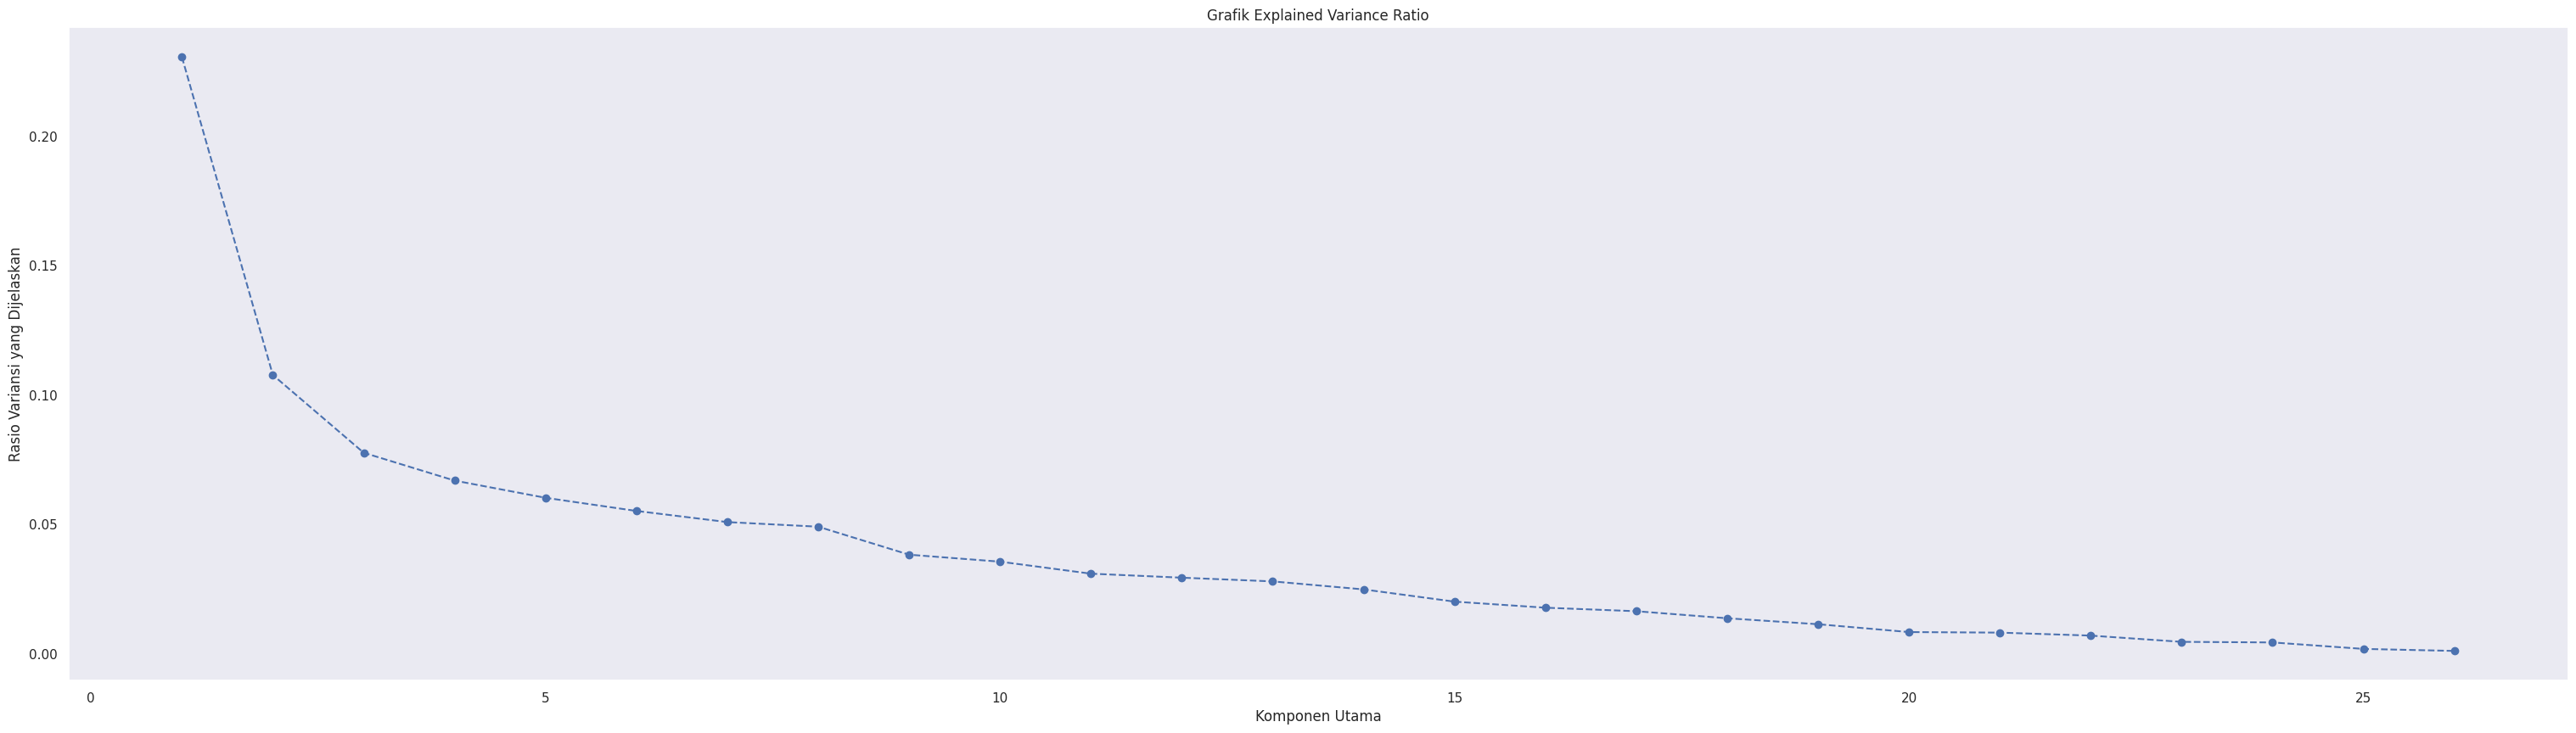

In [104]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Komponen Utama')
plt.ylabel('Rasio Variansi yang Dijelaskan')
plt.title('Grafik Explained Variance Ratio')
plt.grid()
plt.show()

In [105]:
explained_variance_ratio

array([0.23074074, 0.10777485, 0.07768796, 0.06692468, 0.06027118,
       0.05518675, 0.05087995, 0.04909556, 0.03826655, 0.03557137,
       0.03092375, 0.02937593, 0.02793587, 0.02484078, 0.02011064,
       0.01776439, 0.01640347, 0.0136782 , 0.01137482, 0.00833829,
       0.0081268 , 0.0069733 , 0.00455617, 0.00432558, 0.00182655,
       0.00104588])

In [108]:
count = 0
total = 0
while True:
    total += explained_variance_ratio[count]
    count += 1
    if total >=0.95:
        break

print(count)


18


In [111]:
explained_variance_ratio[:18].sum()

0.9534326028592626

In [112]:
pca2 = PCA(n_components=18)
pca2.fit(data_scaled)
transformed_data2 = pca2.transform(data_scaled)

In [113]:
transformed_data2

array([[-6.693423  , -0.17857443, -1.09710276, ...,  0.32858051,
         0.238535  , -0.55118243],
       [ 0.35758681, -1.87774289, -2.14885843, ..., -0.33752855,
         0.64161537,  0.25594717],
       [-3.81888681,  0.08766965,  1.28183862, ...,  0.65700847,
        -0.3799792 , -0.42157467],
       ...,
       [ 0.85883086, -0.17293764, -0.30139085, ...,  0.6834099 ,
        -0.51287925,  0.70308484],
       [-0.5078318 , -1.25857507, -1.30345411, ..., -0.52381693,
         0.66058068,  0.84434766],
       [ 0.30982662, -0.52066949, -0.26118148, ...,  0.33627862,
        -0.1037877 , -0.31150111]])

In [114]:
data_pca = pd.DataFrame(data=transformed_data2, columns=[f"PCA{i+1}" for i in range(18)])
explained_variance2 = pca2.explained_variance_ratio_

In [115]:
data_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18
0,-6.693423,-0.178574,-1.097103,0.685063,2.520046,-0.885927,1.631291,0.513992,1.122877,-0.300933,1.957909,-0.886143,1.095861,-1.683031,0.790092,0.328581,0.238535,-0.551182
1,0.357587,-1.877743,-2.148858,1.140623,-0.528299,0.612786,-0.825122,-0.033505,0.404658,0.399746,-0.929463,0.930499,-0.356833,-0.085749,0.261700,-0.337529,0.641615,0.255947
2,-3.818887,0.087670,1.281839,-0.059138,1.442671,-1.630025,1.322020,-0.459780,-0.925987,2.625258,0.964931,0.576544,0.360135,0.953861,0.465043,0.657008,-0.379979,-0.421575
3,0.615169,-0.517091,1.150516,-0.997228,-0.865513,-0.864178,0.426306,0.367241,1.295790,0.617390,-0.152159,-0.546016,-0.083166,-0.158356,-1.560846,-0.272917,0.065463,-0.342207
4,0.287277,1.776356,0.802110,-0.742743,-1.060633,-1.400157,-0.880925,0.342612,2.123593,-0.315554,-0.531581,1.284152,0.876101,-1.436582,0.848609,0.691733,-1.661020,-0.958357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,0.225087,-2.481784,0.090950,-0.947427,0.781137,1.138043,0.419386,-2.630564,-0.398028,0.721792,1.484884,-0.287652,1.382084,-1.288931,-0.033481,0.299171,-0.542429,0.222164
4198,-0.444992,-1.582497,0.258854,-0.144283,1.827378,0.401993,-0.964465,0.123630,0.106601,-0.075797,-0.435201,0.396306,0.001883,0.378009,-0.132757,0.405448,-0.406038,0.157718
4199,0.858831,-0.172938,-0.301391,1.022120,-2.184359,-0.618549,0.056264,0.205034,0.371503,1.160592,-0.889099,0.575565,-1.395641,-0.252810,0.750470,0.683410,-0.512879,0.703085
4200,-0.507832,-1.258575,-1.303454,2.129787,-3.066038,-0.583146,1.327481,0.634713,0.352633,1.333555,-1.099035,-0.026055,-0.756814,-0.101517,-1.322320,-0.523817,0.660581,0.844348


In [118]:
data_pca["Target"] = dataku["Target"] 

In [119]:
data_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,Target
0,-6.693423,-0.178574,-1.097103,0.685063,2.520046,-0.885927,1.631291,0.513992,1.122877,-0.300933,1.957909,-0.886143,1.095861,-1.683031,0.790092,0.328581,0.238535,-0.551182,Dropout
1,0.357587,-1.877743,-2.148858,1.140623,-0.528299,0.612786,-0.825122,-0.033505,0.404658,0.399746,-0.929463,0.930499,-0.356833,-0.085749,0.261700,-0.337529,0.641615,0.255947,Graduate
2,-3.818887,0.087670,1.281839,-0.059138,1.442671,-1.630025,1.322020,-0.459780,-0.925987,2.625258,0.964931,0.576544,0.360135,0.953861,0.465043,0.657008,-0.379979,-0.421575,Dropout
3,0.615169,-0.517091,1.150516,-0.997228,-0.865513,-0.864178,0.426306,0.367241,1.295790,0.617390,-0.152159,-0.546016,-0.083166,-0.158356,-1.560846,-0.272917,0.065463,-0.342207,Graduate
4,0.287277,1.776356,0.802110,-0.742743,-1.060633,-1.400157,-0.880925,0.342612,2.123593,-0.315554,-0.531581,1.284152,0.876101,-1.436582,0.848609,0.691733,-1.661020,-0.958357,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,0.225087,-2.481784,0.090950,-0.947427,0.781137,1.138043,0.419386,-2.630564,-0.398028,0.721792,1.484884,-0.287652,1.382084,-1.288931,-0.033481,0.299171,-0.542429,0.222164,Graduate
4198,-0.444992,-1.582497,0.258854,-0.144283,1.827378,0.401993,-0.964465,0.123630,0.106601,-0.075797,-0.435201,0.396306,0.001883,0.378009,-0.132757,0.405448,-0.406038,0.157718,Enrolled
4199,0.858831,-0.172938,-0.301391,1.022120,-2.184359,-0.618549,0.056264,0.205034,0.371503,1.160592,-0.889099,0.575565,-1.395641,-0.252810,0.750470,0.683410,-0.512879,0.703085,Graduate
4200,-0.507832,-1.258575,-1.303454,2.129787,-3.066038,-0.583146,1.327481,0.634713,0.352633,1.333555,-1.099035,-0.026055,-0.756814,-0.101517,-1.322320,-0.523817,0.660581,0.844348,Graduate


In [120]:
data_pca.to_csv('data_eda.csv',index=False)